In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cust_df = pd.read_excel("Customer Churn Data.xlsx", engine="openpyxl", sheet_name="Data for DSBA")

In [6]:
cust_df.head()

#how is login device important for understanding customer churn?
#Does city_Tier has any relation with churning of customer?
#rev_per_month and rev_growth_yoy do they have any relation?

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [7]:
cust_df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [294]:
cust_df.shape

(11260, 19)

In [9]:
cust_df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [10]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

0    9364
1    1896
Name: Churn, dtype: int64
0    0.831616
1    0.168384
Name: Churn, dtype: float64


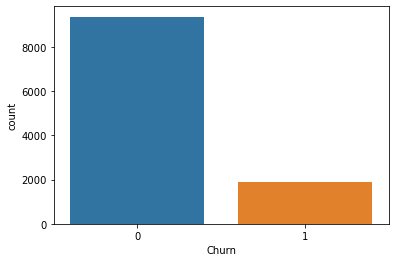

In [62]:
#dependent variable
#What if dependent variable has null entries do we drop those dependent rows?
print(cust_df['Churn'].value_counts())
print(cust_df['Churn'].value_counts(normalize=True))

sns.countplot(cust_df['Churn'])

## 1. Imputation of Bad Data, Null Values, and Outliers

## 1. Tenure

In [297]:
cust_df['Tenure']=np.where(cust_df['Tenure']=="#",1,cust_df['Tenure'])
#bad data imputed with mode

In [64]:
cust_df['Tenure'].value_counts()

1     1467
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
29     114
25     114
31      96
61       2
50       2
51       2
60       2
Name: Tenure, dtype: int64

In [298]:
#datatye converted to numeric
cust_df['Tenure']= pd.to_numeric(cust_df['Tenure'])

In [66]:
cust_df['Tenure'].isnull().sum()

102

In [299]:
#imputing null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer=imputer.fit(cust_df[['Tenure']])
cust_df['Tenure']=imputer.transform(cust_df[['Tenure']])
# print(imp_mean.transform(X))

In [300]:
cust_df['Tenure'].isnull().sum()

0

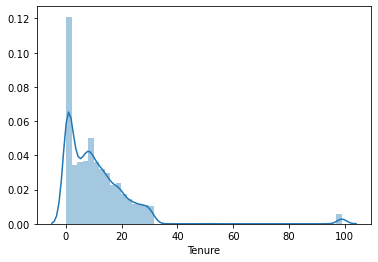

In [69]:
sns.distplot(cust_df['Tenure']);

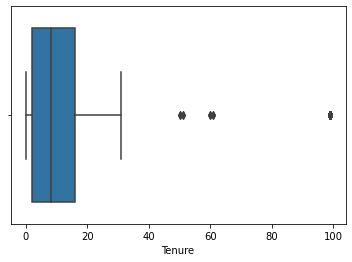

In [70]:
sns.boxplot(cust_df['Tenure']);

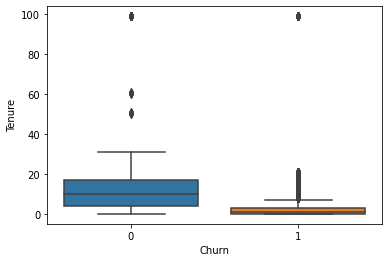

In [71]:
sns.boxplot(y=cust_df['Tenure'],x=cust_df['Churn']);
#lower the tenure more the churn 
#median tenure for churn is higher

## 2. City_Tier

We cannot simply impute City_Tier with any mode technique as there might be some features very common in each city tier. So we will take a prediction and decide.

In [72]:
cust_df['City_Tier'].isnull().sum()

112

In [73]:
pd.crosstab(cust_df['City_Tier'],cust_df['Churn'], normalize=True )

Churn,0,1
City_Tier,,
1.0,0.556781,0.094726
2.0,0.034446,0.008611
3.0,0.240222,0.065213


In [74]:
cust_df1=cust_df.copy()
cust_df1['City_Tier'].fillna("Missing", inplace=True)

In [75]:
cust_df1['City_Tier'].value_counts()
#null is 112 - 0.9 percent of total 
112/11260

0.00994671403197158

In [76]:
cust_df1['City_Tier']=cust_df1['City_Tier'].astype('O')
pd.crosstab(cust_df1['City_Tier'], cust_df1['Churn'], normalize=True)
#they probabaly belongs to city tier 1

Churn,0,1
City_Tier,,
1.0,0.551243,0.093783
2.0,0.034103,0.008526
3.0,0.237833,0.064565
Missing,0.008437,0.001510


In [301]:
cust_df['City_Tier'].fillna(1.0,inplace=True) #imputation through  mode

In [78]:
cust_df['City_Tier'].isnull().sum()

0

In [79]:
# cust_df['City_Tier']=cust_df['City_Tier'].astype('O')

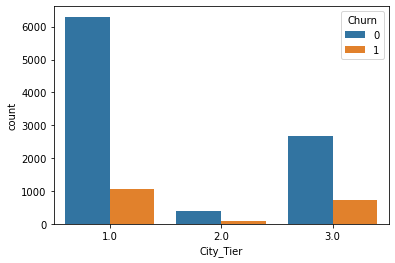

In [80]:
sns.countplot(cust_df['City_Tier'], hue=cust_df['Churn']);
#city tier cannot be a very good predictor 
#though we can definately say that for city tier 2 there are very few entries

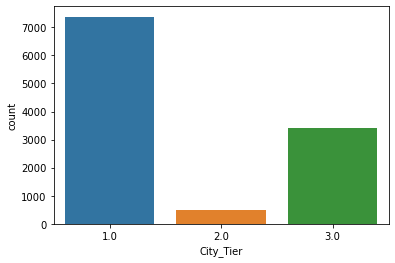

In [81]:
sns.countplot(cust_df['City_Tier']);

## 3. CC_Contacted_LY

In [82]:
cust_df['CC_Contacted_LY'].isnull().sum()

102

In [83]:
cust_df['CC_Contacted_LY'].dtype

dtype('float64')

In [302]:
#imputing null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer=imputer.fit(cust_df[['CC_Contacted_LY']])
cust_df['CC_Contacted_LY']=imputer.transform(cust_df[['CC_Contacted_LY']])
# print(imp_mean.transform(X))

In [85]:
cust_df['CC_Contacted_LY'].isnull().sum()

0

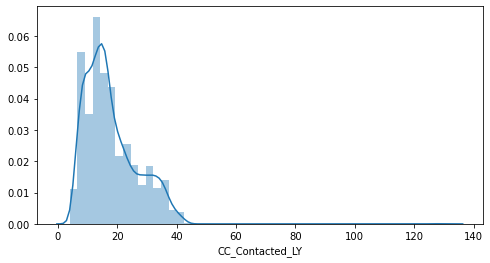

In [86]:
plt.figure(figsize=(8,4))
sns.distplot(cust_df['CC_Contacted_LY']);

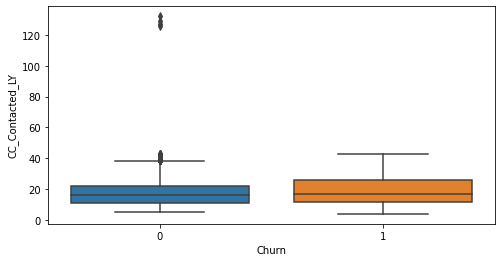

In [87]:
plt.figure(figsize=(8,4))
sns.boxplot(y=cust_df['CC_Contacted_LY'],x=cust_df['Churn']);
#medain value for CC is lower in this sense

## 4. Payment

In [88]:
cust_df['Payment'].isnull().sum()

109

In [303]:
cust_df['Payment'].fillna('Debit Card', inplace=True)
# can be imputed through mode
# would mode be appropriate - are all of these more than 18, all carrying Debit Card

In [90]:
Null_payment= cust_df[cust_df['Payment'].isnull()==True]
Null_payment['Payment'].fillna('Missing', inplace=True)

Series([], Name: Payment, dtype: object)

In [91]:
pd.crosstab(Null_payment['Payment'], Null_payment['cashback'], normalize=True)
#recived cashback which cannot be received on COD

""


In [304]:
cust_df['Payment'].isnull().sum()

0

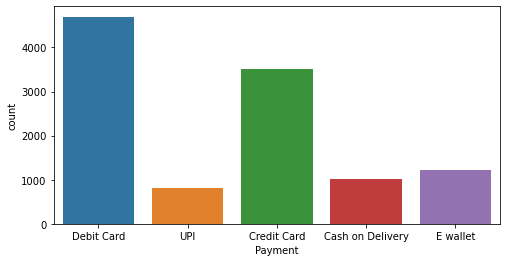

In [93]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Payment']);

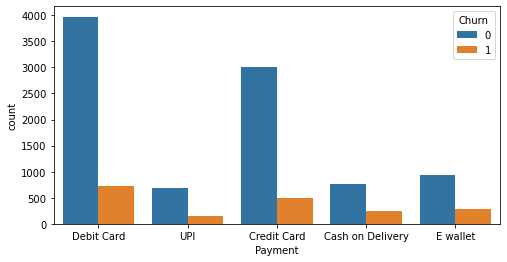

In [94]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Payment'], hue=cust_df['Churn']);

## 5. Gender

In [305]:
cust_df['Gender']=np.where(cust_df['Gender']=='M','Male',cust_df['Gender'])
cust_df['Gender']=np.where(cust_df['Gender']=='F','Female',cust_df['Gender'])

In [96]:
cust_df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [306]:
#null values= 108
cust_df['Gender'].fillna("Male",inplace=True)
#bad data
#adding F to Female and M to Male

In [307]:
cust_df['Gender'].value_counts()

Male      6812
Female    4448
Name: Gender, dtype: int64

In [308]:
cust_df['Gender'].isnull().sum()

0

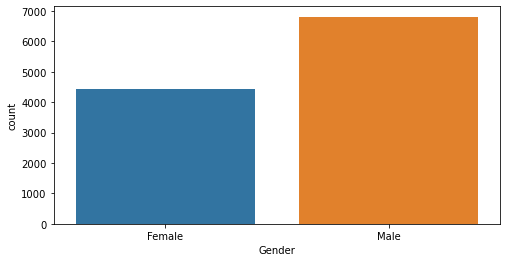

In [100]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Gender']);

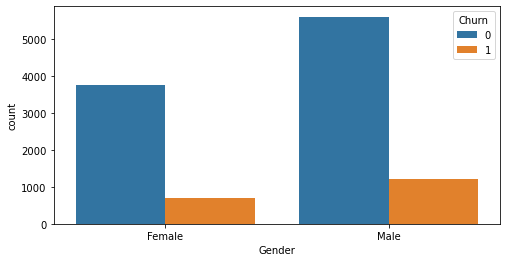

In [101]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Gender'], hue=cust_df['Churn']);

## 6. Service_Score

In [102]:
#null values = 98
cust_df['Service_Score'].value_counts()
#we can combine it later on

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [309]:
cust_df['Service_Score'].fillna(3.0,inplace=True)

In [104]:
cust_df['Service_Score'].isnull().sum()

0

In [105]:
cust_df['Service_Score'].value_counts()

3.0    5588
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

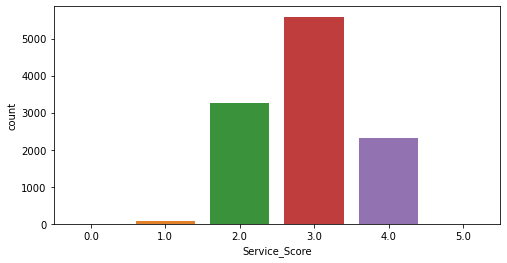

In [106]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Service_Score']);

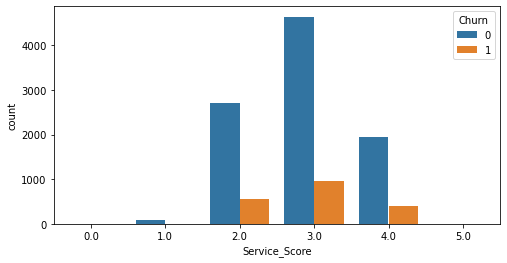

In [107]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Service_Score'], hue=cust_df['Churn']);

## 7. Account_user_count

In [108]:
cust_df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [310]:
#to impute the bad data we made it's own category
cust_df['Account_user_count']=np.where(cust_df['Account_user_count']=='@',4,cust_df['Account_user_count'])

In [110]:
332/11148  
#it is 2%
#it already has many categories 

0.02978112665949049

In [111]:
(4569+3261+1699)/11148 #three categories cover 85% of the data 

0.8547721564406171

In [311]:
cust_df['Account_user_count'].fillna(4,inplace=True)

In [312]:
cust_df['Account_user_count']=cust_df['Account_user_count'].astype('int64')

In [114]:
cust_df['Account_user_count'].value_counts()

4    5013
3    3261
5    1699
2     526
1     446
6     315
Name: Account_user_count, dtype: int64

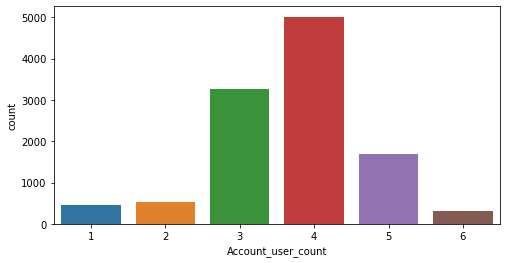

In [115]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Account_user_count']);

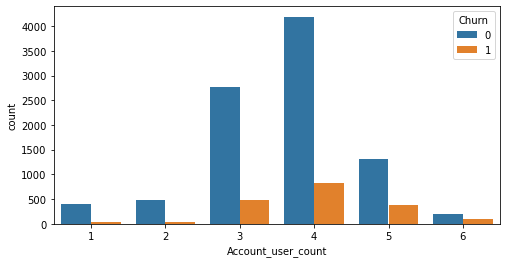

In [116]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Account_user_count'], hue=cust_df['Churn']);

## 8. account_segment

In [117]:
cust_df['account_segment'].value_counts()
#bad data
#null-97
#marked as numerical

#Super + and Super Plus
#Regular Plus and Regular + 

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [313]:
cust_df['account_segment']=np.where(cust_df['account_segment']=='Regular +','Regular Plus',cust_df['account_segment'])
cust_df['account_segment']=np.where(cust_df['account_segment']=='Super +','Super Plus',cust_df['account_segment'])

In [119]:
cust_df['account_segment'].value_counts()
#bad data removed

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [314]:
cust_df['account_segment'].fillna('Regular Plus', inplace=True)

In [315]:
cust_df['account_segment'].isnull().sum()

0

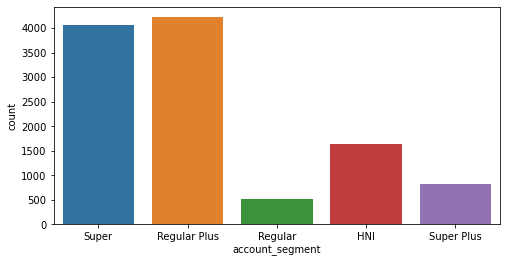

In [122]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['account_segment']);

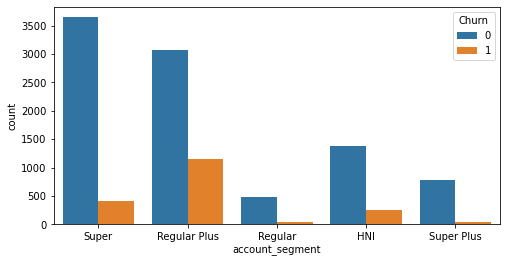

In [123]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['account_segment'], hue=cust_df['Churn']);

## 9. CC_Agent_Score

In [124]:
#null_value=116
cust_df['CC_Agent_Score'].isnull().sum()

116

In [125]:
116/11144 #it's just 1 percent

0.0104091888011486

In [126]:
3360/11144

0.3015075376884422

In [316]:
cust_df['CC_Agent_Score'].fillna(3.0, inplace=True)

In [317]:
cust_df['CC_Agent_Score'].value_counts()

3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

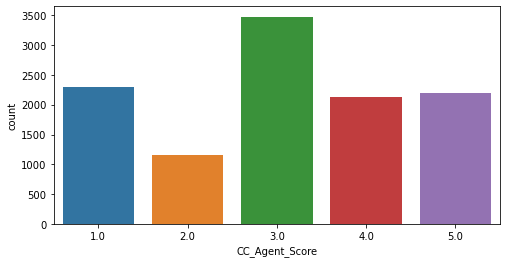

In [129]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['CC_Agent_Score']);

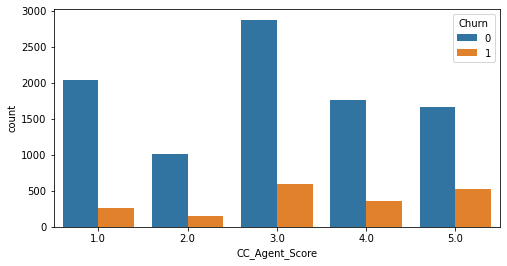

In [130]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['CC_Agent_Score'], hue=cust_df['Churn']);

## 10. Marital_Status

In [131]:
#null  values = 212 hardly 0.019188993 (round 2%)
#there is some possibility purchased by male and married
pd.crosstab(cust_df["Marital_Status"],cust_df['Gender'])

Gender,Female,Male
Marital_Status,,
Divorced,678,990
Married,2209,3651
Single,1479,2041


In [318]:
#mode imputation
cust_df["Marital_Status"].fillna("Married", inplace=True)

In [133]:
cust_df["Marital_Status"].value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

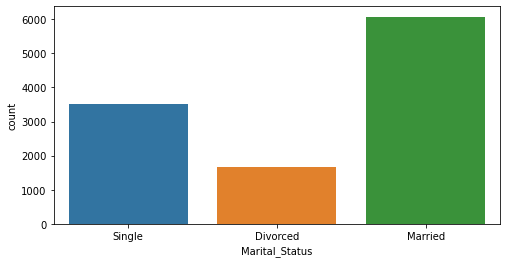

In [134]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Marital_Status']);

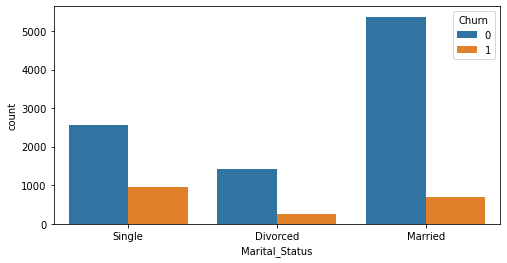

In [135]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Marital_Status'], hue=cust_df['Churn']);

## 11. rev_per_month

In [136]:
#Bad data : 689 marked +  [how can we impute it- mode?]  
#Null values : 102  [impute through mode]
#Marked as categorical but numerical

cust_df['rev_per_month'].value_counts().sum() 

11158

In [137]:
print((689)/11158)     #6 percent 
print((689+102)/11158) #intotal 10 percent, 

#We can create seperate category but what value to put in
#imputing it with some category would be more judicious 

0.061749417458325864
0.07089084065244668


In [319]:
cust_df['rev_per_month']=np.where(cust_df['rev_per_month']=="+",3,cust_df['rev_per_month'])
#3,2,5 is more likely to occur

In [320]:
cust_df['rev_per_month'].fillna(2, inplace=True)
#to balance between 3 and 2

In [321]:
cust_df['rev_per_month'].dtype

dtype('int64')

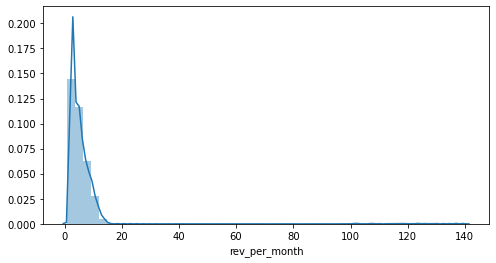

In [141]:
plt.figure(figsize=(8,4))
sns.distplot(cust_df['rev_per_month']);

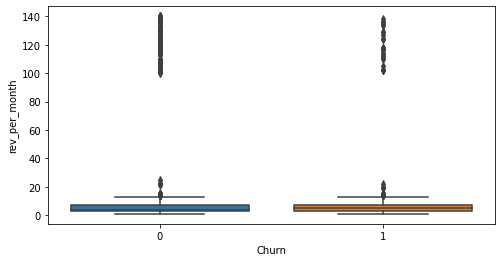

In [142]:
plt.figure(figsize=(8,4))
sns.boxplot(y=cust_df['rev_per_month'], x=cust_df['Churn']);

## 12. Complain_ly

In [322]:
# cust_df['Complain_ly'].value_counts().sum()
#null values present 357 which is hardly 0.03274328
cust_df['Complain_ly'].fillna(0.0,inplace=True)

In [323]:
cust_df['Complain_ly'].dtype

dtype('float64')

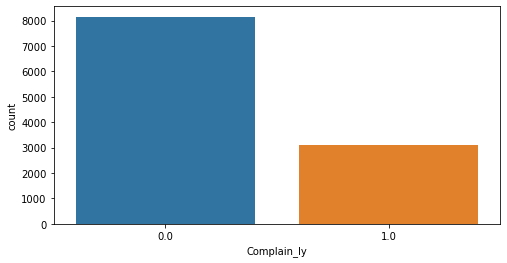

In [145]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Complain_ly']);

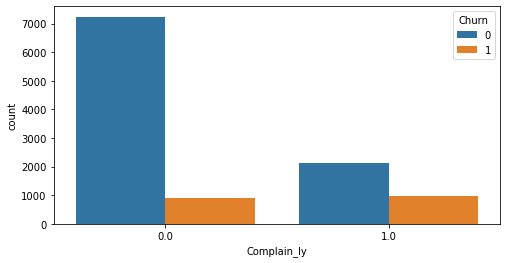

In [146]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Complain_ly'], hue=cust_df['Churn']);

## 13. rev_growth_yoy

In [324]:
#bad data $ = 3
cust_df['rev_growth_yoy']=np.where(cust_df['rev_growth_yoy']=="$",14,cust_df['rev_growth_yoy'])

In [148]:
cust_df['rev_growth_yoy'].value_counts()

14    1527
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
Name: rev_growth_yoy, dtype: int64

In [325]:
cust_df['rev_growth_yoy']=cust_df['rev_growth_yoy'].astype('int64')

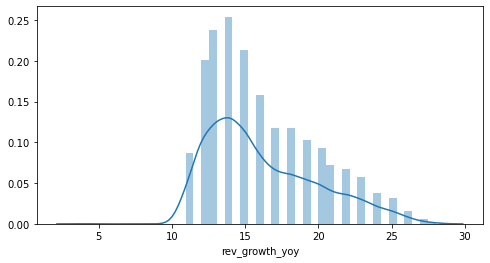

In [150]:
plt.figure(figsize=(8,4))
sns.distplot(cust_df['rev_growth_yoy']);

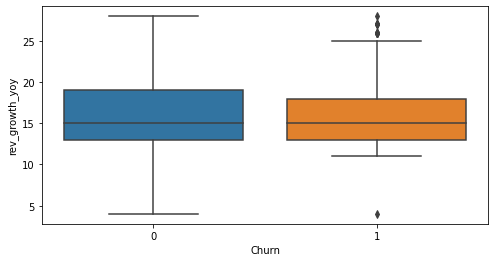

In [151]:
plt.figure(figsize=(8,4))
sns.boxplot(y=cust_df['rev_growth_yoy'], x=cust_df['Churn']);

## 14. coupon_used_for_payment

In [152]:
#  Bad data :  $ * and #  [mode] 
#  Null values : 0
#  Datatypes marked as categorical changed to numerical
cust_df['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
*        1
#        1
$        1
Name: coupon_used_for_payment, dtype: int64

In [326]:
cust_df['coupon_used_for_payment']=np.where(cust_df['coupon_used_for_payment']=="#",1,cust_df['coupon_used_for_payment'])
cust_df['coupon_used_for_payment']=np.where(cust_df['coupon_used_for_payment']=="$",1,cust_df['coupon_used_for_payment'])
cust_df['coupon_used_for_payment']=np.where(cust_df['coupon_used_for_payment']=="*",1,cust_df['coupon_used_for_payment'])

In [154]:
cust_df['coupon_used_for_payment'].value_counts()

1     4376
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
Name: coupon_used_for_payment, dtype: int64

In [327]:
cust_df['coupon_used_for_payment']=cust_df['coupon_used_for_payment'].astype('int64')

In [156]:
cust_df['coupon_used_for_payment'].dtypes

dtype('int64')

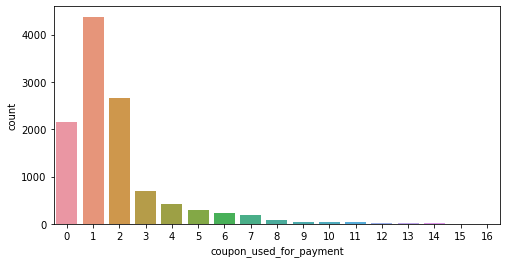

In [157]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['coupon_used_for_payment']);

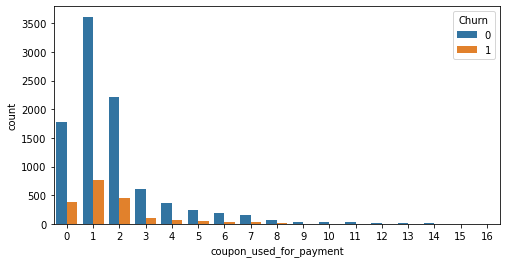

In [158]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['coupon_used_for_payment'], hue=cust_df['Churn']);

## 15. Day_Since_CC_connect

In [159]:
# Day_Since_CC_connect
# Bad data :  $  [mode or median]
# Null values : 357 
# Datatypes marked as categorical changed to numerical

In [160]:
cust_df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
47       2
30       2
31       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [328]:
cust_df['Day_Since_CC_connect']=np.where(cust_df['Day_Since_CC_connect']=="$",3,cust_df['Day_Since_CC_connect'])

In [162]:
cust_df['Day_Since_CC_connect'].isnull().sum()

357

In [329]:
#with mode na imputation
cust_df['Day_Since_CC_connect'].fillna(3,inplace=True)

In [330]:
cust_df['Day_Since_CC_connect'].isnull().sum()

0

In [331]:
#change the datatype
cust_df['Day_Since_CC_connect']=cust_df['Day_Since_CC_connect'].astype('int64')

In [166]:
cust_df['Day_Since_CC_connect'].dtypes

dtype('int64')

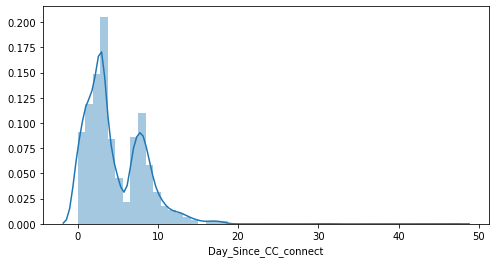

In [167]:
plt.figure(figsize=(8,4))
sns.distplot(cust_df['Day_Since_CC_connect']);

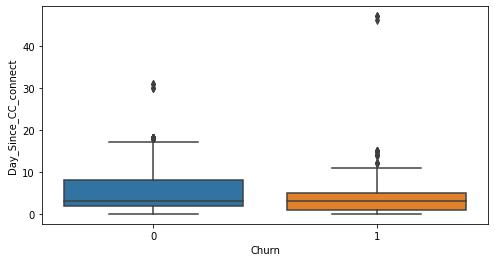

In [168]:
plt.figure(figsize=(8,4))
sns.boxplot(y=cust_df['Day_Since_CC_connect'], x=cust_df['Churn']);

## 16. cashback

In [169]:
cust_df['cashback'].dtype #bad data present see-- above

dtype('O')

In [332]:
#marking bad value as null
cust_df['cashback'].replace("$", np.NaN,inplace=True)

In [171]:
# cust_df[cust_df['cashback']=="$"]

In [333]:
cust_df['cashback']= round(cust_df['cashback'],2)
                           
#124.61000000000001, 125.13999999999999some values like this in cashback

In [173]:
cust_df['cashback'].to_list() #clean

[159.93,
 120.9,
 nan,
 134.07,
 129.6,
 139.19,
 120.86,
 122.93,
 126.83,
 122.93,
 295.45,
 153.81,
 134.41,
 133.88,
 196.19,
 120.73,
 129.26,
 157.44,
 160.74,
 149.63,
 161.72,
 203.12,
 116.75,
 nan,
 206.5,
 142.0,
 172.95,
 123.06,
 123.48,
 189.98,
 143.19,
 1974.0,
 133.46,
 208.55,
 122.31,
 123.23,
 120.24,
 127.13,
 194.39,
 125.66,
 299.26,
 124.51,
 194.19,
 186.86,
 130.38,
 130.58,
 123.25,
 120.88,
 130.72,
 150.06,
 142.57,
 125.0,
 111.02,
 204.53,
 122.88,
 139.29,
 123.11,
 131.4,
 nan,
 144.5,
 127.56,
 290.33,
 287.22,
 195.47,
 237.34,
 299.99,
 122.79,
 159.16,
 120.89,
 267.92,
 135.64,
 144.25,
 152.65,
 165.53,
 162.61,
 142.98,
 168.04,
 138.15,
 127.41,
 166.73,
 176.39,
 123.28,
 121.53,
 148.76,
 193.96,
 204.0,
 184.74,
 199.81,
 224.9,
 126.57,
 235.91,
 166.96,
 120.58,
 188.65,
 159.4,
 159.14,
 126.22,
 221.85,
 206.09,
 143.45,
 121.77,
 0.0,
 179.18,
 187.89,
 123.89,
 132.12,
 292.32,
 122.67,
 295.17,
 124.36,
 260.64,
 127.07,
 290.68,
 139.

In [334]:
# Bad data :  $ for two values  [median]- 2 vlaues
# Null values : 471 
# Datatypes marked as categorical change to numerical
# Can we round of values to two places in the column?

#imputing null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer=imputer.fit(cust_df[['cashback']])
cust_df['cashback']=imputer.transform(cust_df[['cashback']])
# print(imp_mean.transform(X))

In [335]:
cust_df['cashback'].isnull().sum()

0

In [336]:
#change the datatype after imputation as it cannot convert NaN to int
cust_df['cashback']=cust_df['cashback'].astype('int64')

In [337]:
cust_df['cashback'].dtype

dtype('int64')

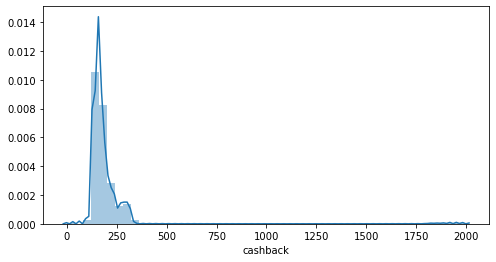

In [178]:
plt.figure(figsize=(8,4))
sns.distplot(cust_df['cashback']);

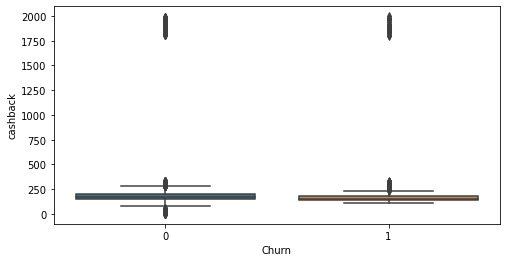

In [179]:
plt.figure(figsize=(8,4))
sns.boxplot(y=cust_df['cashback'], x=cust_df['Churn']);

## 17. Login_device

In [180]:
cust_df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [338]:
#we not create another category for &&&& as it is just 4 percent of the data
#and other two make 96% of the data
#planning to make a seperate category as when you login data goes in - unidentified device
cust_df['Login_device']=np.where(cust_df['Login_device']=='&&&&','Mobile',cust_df['Login_device'])

In [182]:
print(539/11039)  #for &&&&
print(760/11039)  #null plus bad data 

0.04882688649334179
0.06884681583476764


In [339]:
cust_df['Login_device'].fillna('Mobile', inplace=True)

In [340]:
cust_df['Login_device'].value_counts()

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [185]:
# #imputations done and we have removed the bad data as well. 
# cust_df['Login_device']=np.where(cust_df['Login_device']=="Mobile",0,cust_df['Login_device'])
# cust_df['Login_device']=np.where(cust_df['Login_device']=="Computer",1,cust_df['Login_device'])

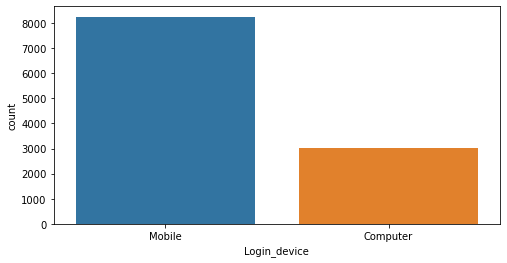

In [186]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Login_device']);

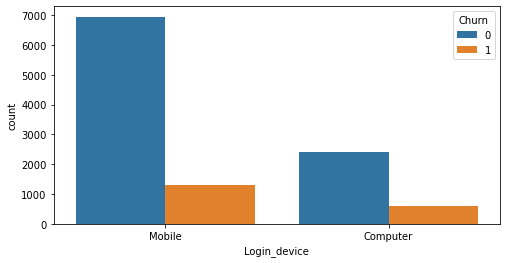

In [187]:
plt.figure(figsize=(8,4))
sns.countplot(cust_df['Login_device'], hue=cust_df['Churn']);

In [341]:
cust_df['Login_device'].dtype

dtype('O')

In [189]:
#change the datatype
# cust_df['Login_device']=cust_df['Login_device'].astype('int64')

In [190]:
cust_df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [191]:
cust_df2=cust_df.copy()

In [1]:
cust_df2=cust_df[['Tenure','CC_Contacted_LY', 'rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']]

NameError: name 'cust_df' is not defined

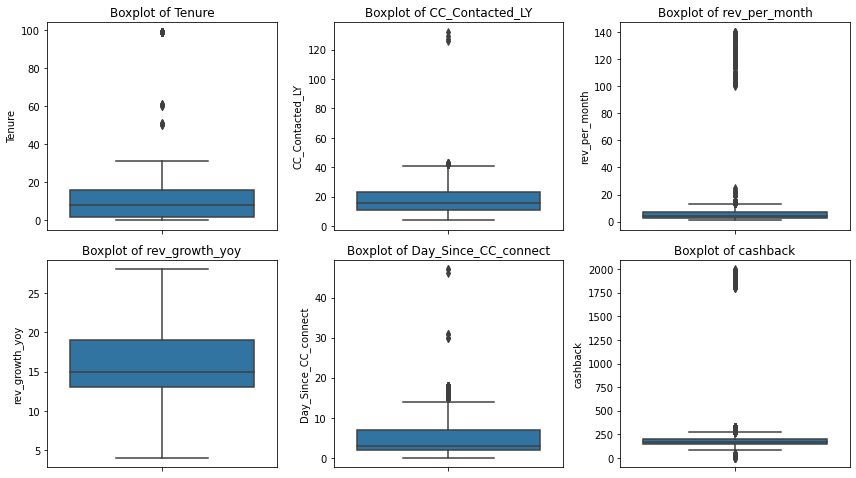

In [193]:
plt.figure(figsize = (12,10))
feature_list = cust_df2.columns #To acess all columns
for i in range(len(feature_list)):  # Instead of giving instructions again and again, running for loop 
        plt.subplot(3,3,i+1) #How many subplot do we require- rows and columns. Indexing starts from 1
        sns.boxplot(y= cust_df2[feature_list[i]], data = cust_df2) #boxplot
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout();

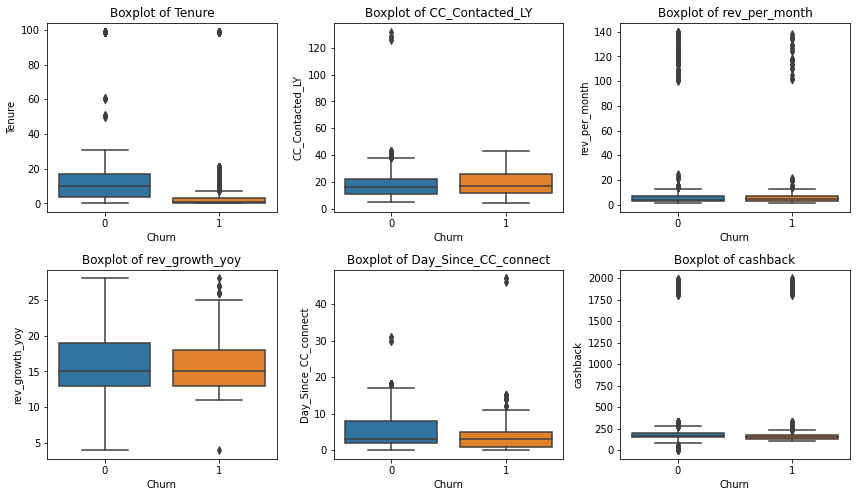

In [194]:
plt.figure(figsize = (12,10))
feature_list = cust_df2.columns #To acess all columns
for i in range(len(feature_list)):  # Instead of giving instructions again and again, running for loop 
        plt.subplot(3,3,i+1) #How many subplot do we require- rows and columns. Indexing starts from 1
        sns.boxplot(y= cust_df2[feature_list[i]], x=cust_df['Churn'], data = cust_df1) #boxplot
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout();

In [195]:
# removing outliers
# def remove_outliers(col):
#     sorted(col)
#     Q1,Q3= np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range=Q1-(1.5*IQR)
#     upper_range=Q3+(1.5*IQR)
#     return lower_range, upper_range

In [196]:
# for columns in cust_df.columns:
#     lr,ur= remove_outliers(cust_df[columns])
#     cust_df[columns] = np.where(cust_df[columns]>ur,ur,cust_df[columns])
#     cust_df[columns] = np.where(cust_df[columns]<lr,lr,cust_df[columns])

In [5]:
#for treating outliers. 
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [6]:
cust_df["Tenure"]=treat_outlier(cust_df["Tenure"])
cust_df["CC_Contacted_LY"]=treat_outlier(cust_df["CC_Contacted_LY"])
cust_df["rev_per_month"]=treat_outlier(cust_df["rev_per_month"])
cust_df["Day_Since_CC_connect"]=treat_outlier(cust_df["Day_Since_CC_connect"])
cust_df["cashback"]=treat_outlier(cust_df["cashback"])

TypeError: '<' not supported between instances of 'str' and 'int'

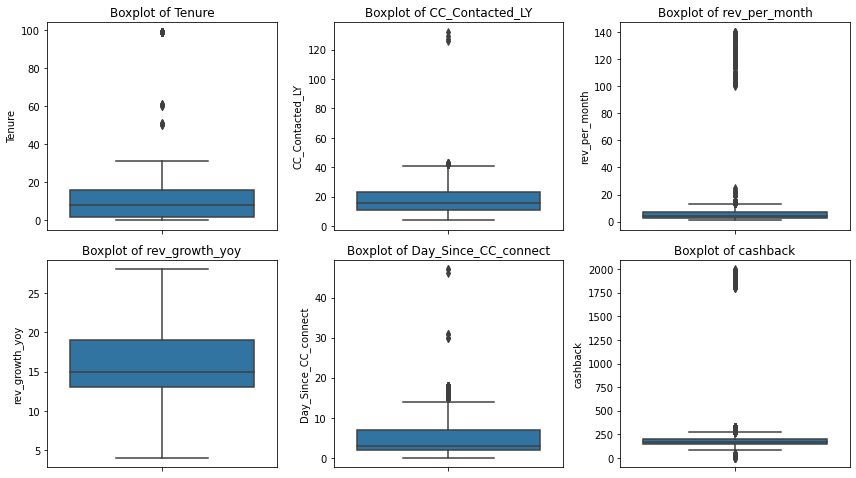

In [199]:
plt.figure(figsize = (12,10))
feature_list = cust_df2.columns #To acess all columns
for i in range(len(feature_list)):  # Instead of giving instructions again and again, running for loop 
        plt.subplot(3,3,i+1) #How many subplot do we require- rows and columns. Indexing starts from 1
        sns.boxplot(y= cust_df2[feature_list[i]], data = cust_df2) #boxplot
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout();

In [344]:
cust_df_customer=cust_df.copy()

In [345]:
cust_df_customer.drop(['AccountID'],axis=1,inplace=True)

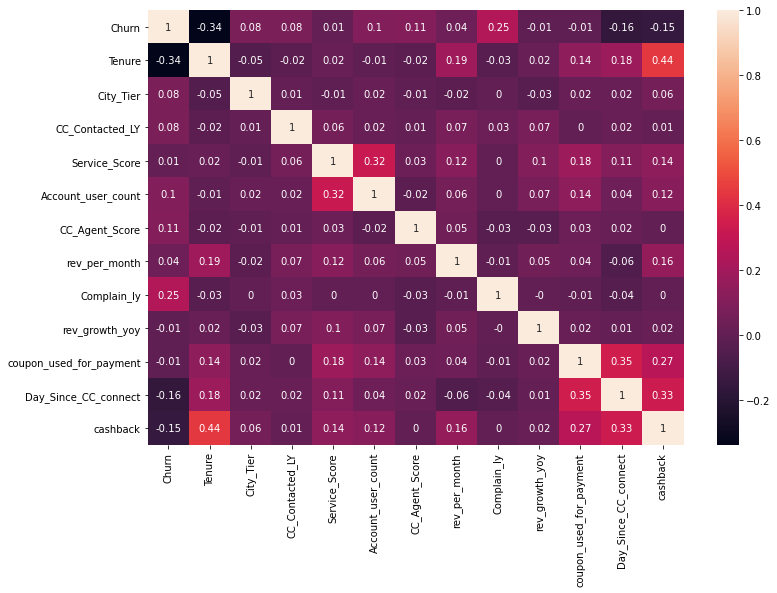

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(round(cust_df_customer.corr(),2), annot=True, fmt='.2g');

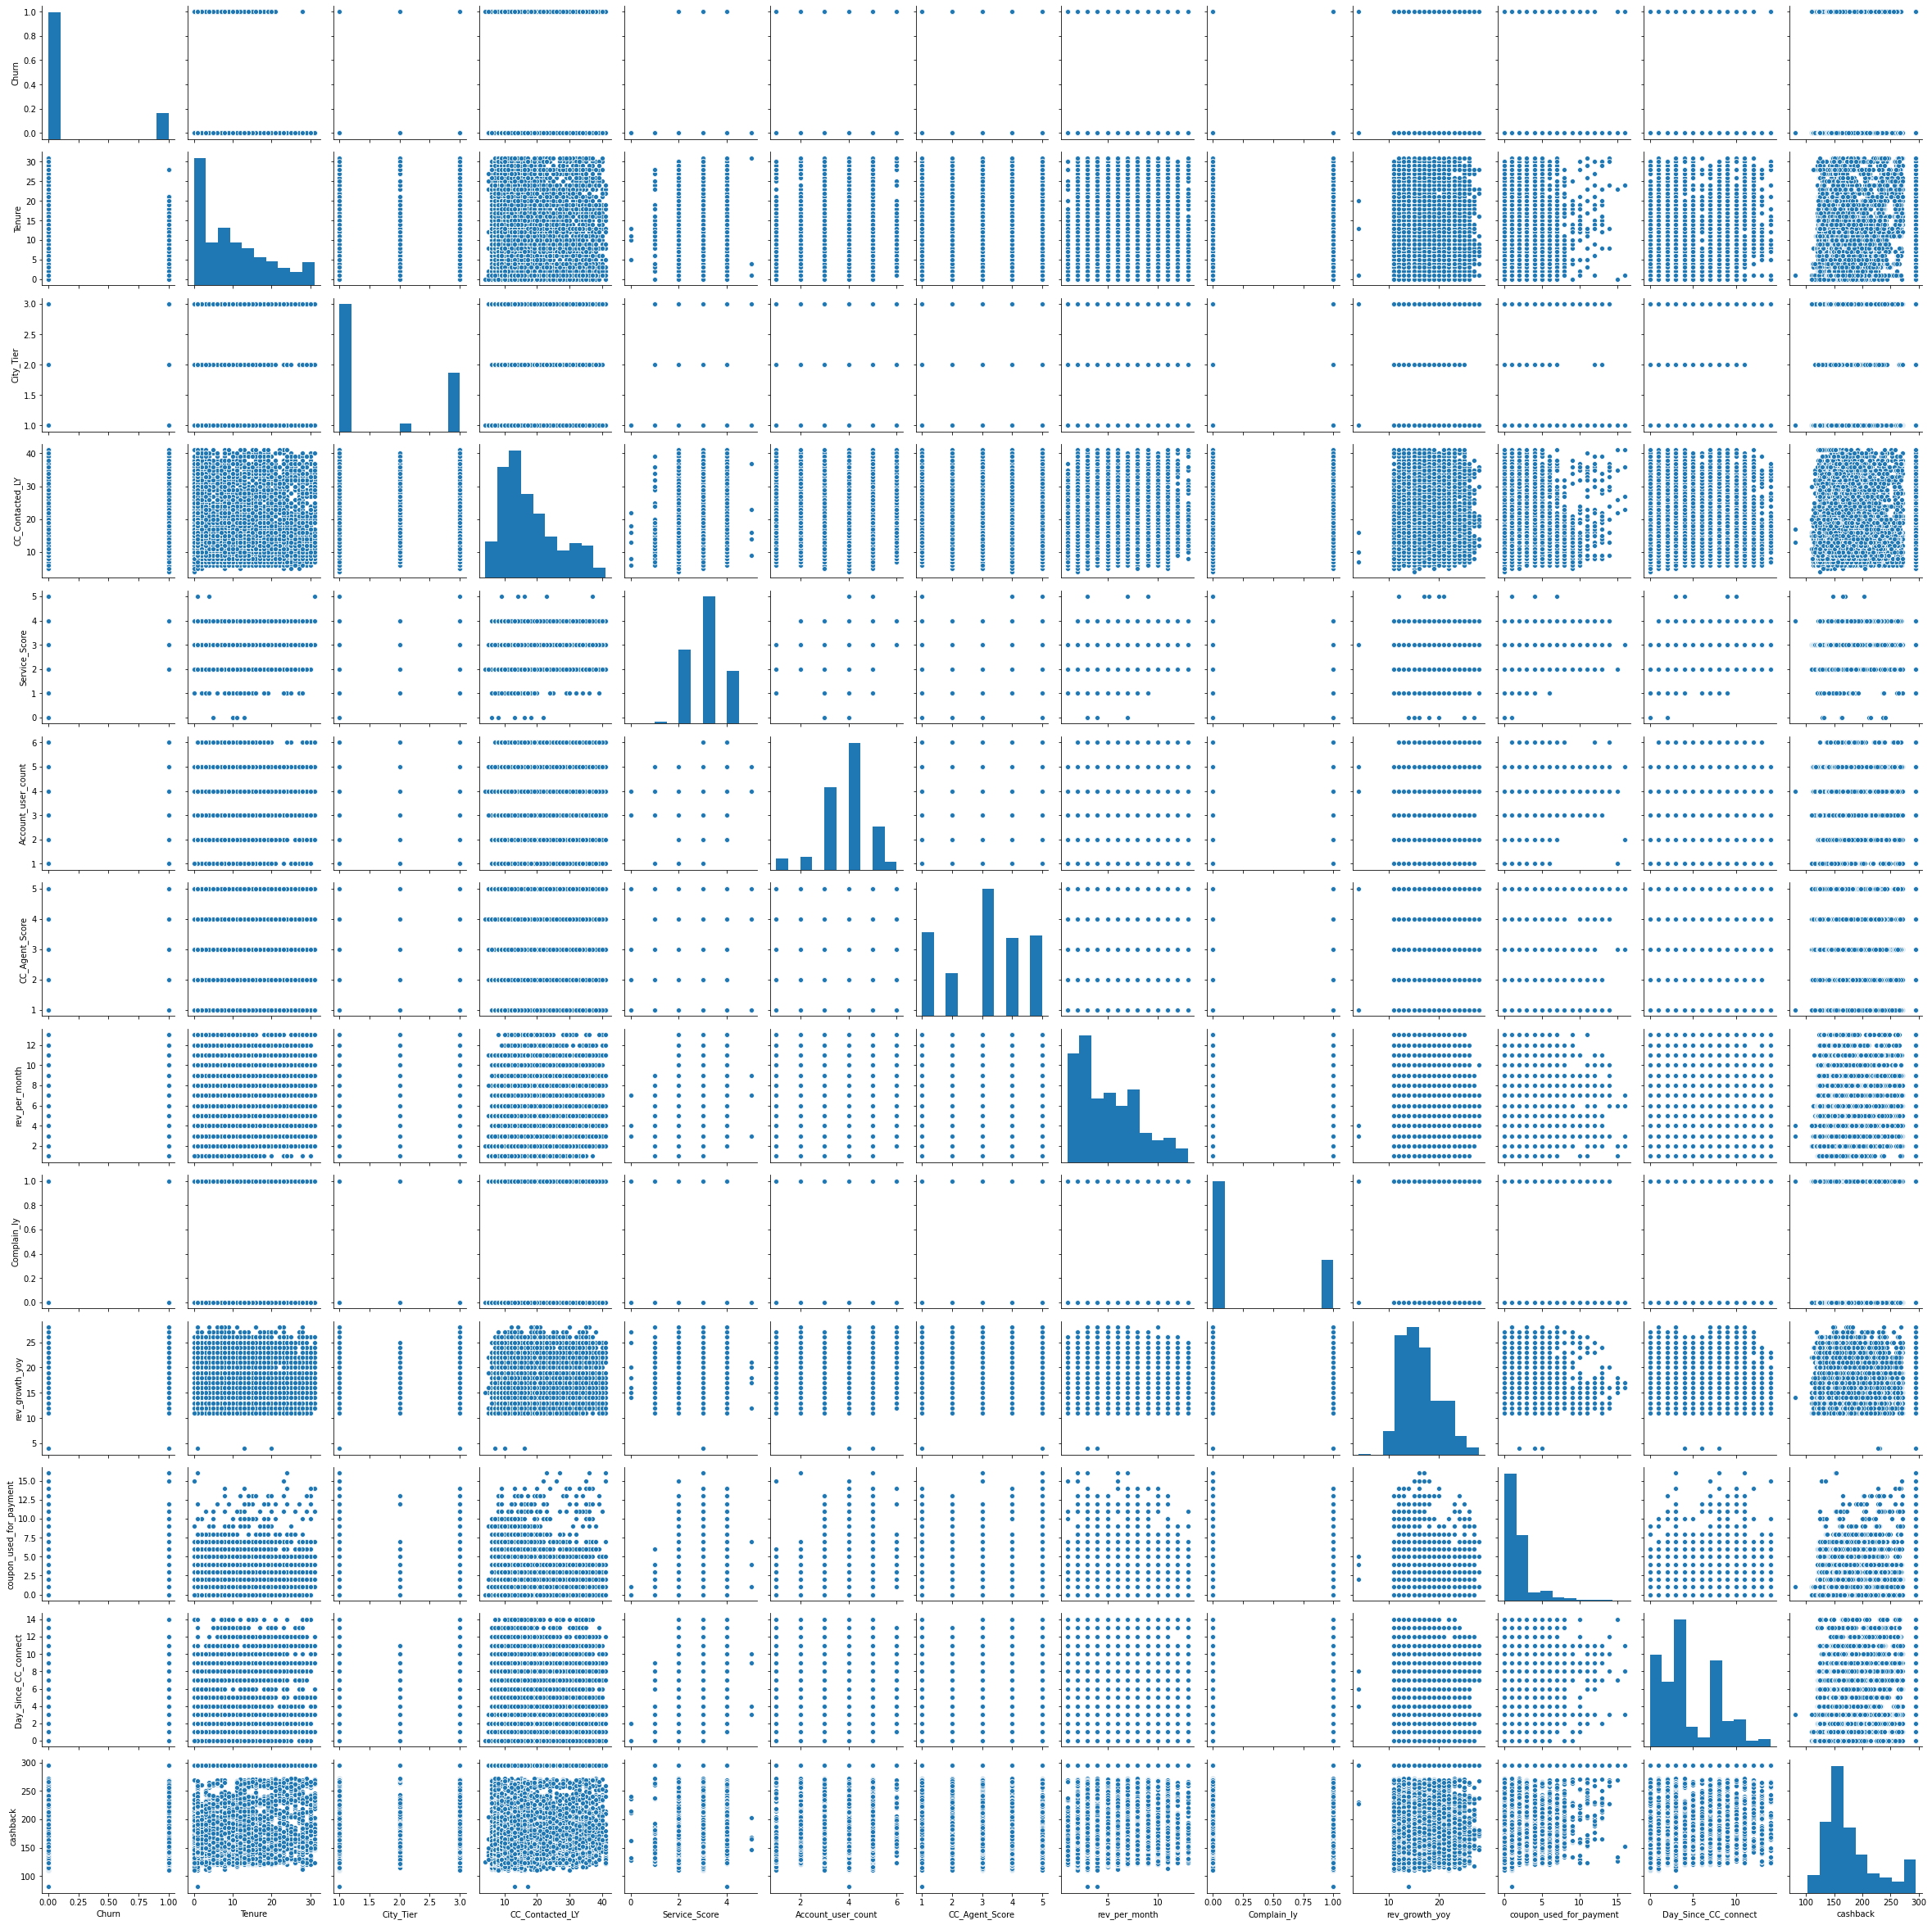

In [202]:
sns.pairplot(cust_df_customer)

In [263]:
cust_df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  int64  
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  int64  
 13  coupon_used_for_payment  11260 non-null  int64  
 14  Day_Since_CC_connect  

### Encoding 

In [204]:

# pd.categorical
# payment 

# pd.dummies
# Gender 
# Login Device

# account segment - as 0,1,2,3,4 
# marital_status - merging single and divorced

In [349]:
cust_df_customer['Payment']=np.where(cust_df_customer['Payment']=="Debit Card",4,cust_df_customer['Payment'])
cust_df_customer['Payment']=np.where(cust_df_customer['Payment']=="Credit Card",3,cust_df_customer['Payment'])
cust_df_customer['Payment']=np.where(cust_df_customer['Payment']=="E wallet",2,cust_df_customer['Payment'])
cust_df_customer['Payment']=np.where(cust_df_customer['Payment']=="Cash on Delivery",1,cust_df_customer['Payment'])
cust_df_customer['Payment']=np.where(cust_df_customer['Payment']=="UPI",0,cust_df_customer['Payment'])

#according to the preference of the customers. 


In [350]:
cust_df_customer['Payment'].value_counts()

4    4696
3    3511
2    1217
1    1014
0     822
Name: Payment, dtype: int64

In [348]:
cust_df['Payment'].value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [351]:
cust_df_customer['Gender']=pd.get_dummies(cust_df_customer['Gender'],drop_first=True,prefix='Gender')
#0 female
#1 male

In [207]:
cust_df['Login_device'].value_counts()

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [352]:
cust_df_customer['Login_device']=pd.get_dummies(cust_df_customer['Login_device'],drop_first=True)

In [353]:
cust_df_customer['account_segment']=np.where(cust_df_customer['account_segment']=="Regular",0,cust_df_customer['account_segment'])
cust_df_customer['account_segment']=np.where(cust_df_customer['account_segment']=="Regular Plus",1,cust_df_customer['account_segment'])
cust_df_customer['account_segment']=np.where(cust_df_customer['account_segment']=="Super",2,cust_df_customer['account_segment'])
cust_df_customer['account_segment']=np.where(cust_df_customer['account_segment']=="Super Plus",3,cust_df_customer['account_segment'])
cust_df_customer['account_segment']=np.where(cust_df_customer['account_segment']=="HNI",4,cust_df_customer['account_segment'])

In [354]:
cust_df_customer['Marital_Status']=np.where(cust_df_customer['Marital_Status']=="Married",1,cust_df_customer['Marital_Status'])
cust_df_customer['Marital_Status']=np.where(cust_df_customer['Marital_Status']=="Single",0,cust_df_customer['Marital_Status'])
cust_df_customer['Marital_Status']=np.where(cust_df_customer['Marital_Status']=="Divorced",0,cust_df_customer['Marital_Status'])

In [355]:
cust_df_customer.head()
#0 female
#1 male

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,4,0,3.0,3,2,2.0,0,9.0,1.0,11,1,5.0,159.0,1
1,1,0.0,1.0,8.0,0,1,3.0,4,1,3.0,0,7.0,1.0,15,0,0.0,120.0,1
2,1,0.0,1.0,30.0,4,1,2.0,4,1,3.0,0,6.0,1.0,14,0,3.0,165.0,1
3,1,0.0,3.0,15.0,4,1,2.0,4,2,5.0,0,8.0,0.0,23,0,3.0,134.0,1
4,1,0.0,1.0,12.0,3,1,2.0,3,1,5.0,0,3.0,0.0,11,1,3.0,129.0,1


# MODEL BUILDING

### Model 1 : Logistic Regression

In [356]:
#For this particular 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve

In [357]:
#splitting the data
X = cust_df_customer.drop(['Churn'], axis=1)
Y = cust_df_customer.pop('Churn')

In [359]:
X.shape

(11260, 17)

In [273]:
Y.shape

(11260,)

In [360]:
#train_test_split
#30% - test
#70% - train 
x_train, x_test, train_labels, test_labels = train_test_split(X,Y, test_size =0.30, random_state=7)

In [367]:
print(x_train.shape)
print(train_labels.shape)

(7882, 17)
(7882,)


In [369]:
print(x_test.shape)
print(test_labels.shape)

(3378, 17)
(3378,)


In [361]:
#training the model
model_logistic=LogisticRegression(solver='liblinear')
model_logistic.fit(x_train,train_labels)

LogisticRegression(solver='liblinear')

In [370]:
# Predicting 
y_train_predict = model_logistic.predict(x_train)
y_test_predict = model_logistic.predict(x_test)
y_train_predict_proba = model_logistic.predict_proba(x_train)
y_test_predict_proba = model_logistic.predict_proba(x_test)

In [371]:
#Verification 
#for train
confusion_matrix(train_labels, y_train_predict)

array([[6326,  217],
       [ 750,  589]], dtype=int64)

In [372]:
print(classification_report(train_labels,y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6543
           1       0.73      0.44      0.55      1339

    accuracy                           0.88      7882
   macro avg       0.81      0.70      0.74      7882
weighted avg       0.87      0.88      0.86      7882



In [373]:
auc_train= roc_auc_score(train_labels, y_train_predict_proba[:,1])
auc_train

0.869158095517252

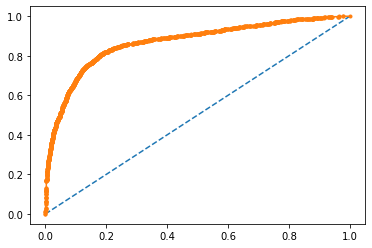

In [374]:
fpr,tpr,threshold= roc_curve(train_labels, y_train_predict_proba[:,1])
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.');

In [375]:
model_logistic.score(x_train,train_labels)

0.8773154021821873

In [376]:
#for test
confusion_matrix(test_labels, y_test_predict)

array([[2733,   88],
       [ 287,  270]], dtype=int64)

In [378]:
print(classification_report(test_labels,y_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2821
           1       0.75      0.48      0.59       557

    accuracy                           0.89      3378
   macro avg       0.83      0.73      0.76      3378
weighted avg       0.88      0.89      0.88      3378



In [379]:
auc_test= roc_auc_score(test_labels, y_test_predict_proba[:,1])
auc_test

0.8683011550330714

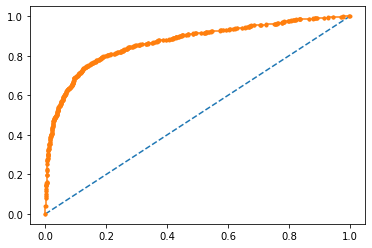

In [380]:
fpr,tpr,threshold= roc_curve(test_labels, y_test_predict_proba[:,1])
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.');

In [381]:
model_logistic.score(x_test,test_labels)

0.88898756660746

In [382]:
for idx, col_name in enumerate (x_train.columns):
    print("The coefficient for {} is {}".format(col_name,model_logistic.coef_[0][idx]))

The coefficient for Tenure is -0.18100698780432517
The coefficient for City_Tier is 0.2784431141605286
The coefficient for CC_Contacted_LY is 0.023128534509069248
The coefficient for Payment is -0.07221568391361406
The coefficient for Gender is 0.26092693079458773
The coefficient for Service_Score is -0.0969614190803925
The coefficient for Account_user_count is 0.3243892040998973
The coefficient for account_segment is -0.10964126022398282
The coefficient for CC_Agent_Score is 0.26571658422152805
The coefficient for Marital_Status is -0.8351258416751174
The coefficient for rev_per_month is 0.12326160083145898
The coefficient for Complain_ly is 1.5208323625343634
The coefficient for rev_growth_yoy is -0.029890882495198477
The coefficient for coupon_used_for_payment is 0.14209916977751275
The coefficient for Day_Since_CC_connect is -0.11216027523191492
The coefficient for cashback is -0.001376997077133049
The coefficient for Login_device is -0.45067031699301996


### Model Tuning :Logistic

In [396]:
#Using Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver' : ['liblinear', 'lbfgs'],
    'max_iter' : [100, 200],
    'C' : [1.0, 1.50, 2.0]
}

model_Logistic= LogisticRegression(random_state=7)
grid_search= GridSearchCV(estimator = model_Logistic, param_grid=param_grid, cv=3)

In [397]:
grid_search.fit(x_train,train_labels)

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\RASHMI\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=7),
             param_grid={'C': [1.0, 1.5, 2.0], 'max_iter': [100, 200],
                         'solver': ['liblinear', 'lbfgs']})

In [398]:
grid_search.best_params_

{'C': 1.5, 'max_iter': 100, 'solver': 'liblinear'}

In [399]:
grid_search.best_estimator_

LogisticRegression(C=1.5, random_state=7, solver='liblinear')

In [400]:
model_Logistic_tuned = LogisticRegression(max_iter=100, solver= 'liblinear', C= 1.5)
model_Logistic_tuned.fit(x_train,train_labels)

LogisticRegression(C=1.5, solver='liblinear')

In [402]:
model_Logistic_tuned.score(x_train, train_labels)

0.87706165947729

In [401]:
model_Logistic_tuned.score(x_test, test_labels)   #Nothing as changed much 

0.88898756660746

## Model 2 : LDA

In [243]:
import scipy.stats as stats 
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [383]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [386]:
#Prepare and scale the data
x_matrix= np.asmatrix(cust_df_customer[[ 'Tenure','City_Tier', 'CC_Contacted_LY', 'Payment','Service_Score', 'Gender', 'Account_user_count','account_segment','CC_Agent_Score','Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device']])
x_matrix_scaled=scale(x_matrix)
y_array=np.asarray(cust_df['Churn'])

In [387]:
#Train-test_split
#train-test_split
x_train1,x_test1,train_labels1, test_labels1 =train_test_split(x_matrix_scaled,y_array,test_size=.30, random_state=7)

In [388]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(x_train1,train_labels1)

LinearDiscriminantAnalysis()

In [389]:
model_LDA.score(x_train1,train_labels1)

0.8747779751332149

In [390]:
model_LDA.score(x_test1,test_labels1)

0.8836589698046181

In [391]:
model_LDA.coef_.T

array([[-1.13557084],
       [ 0.26104155],
       [ 0.19938223],
       [-0.11625138],
       [-0.0879999 ],
       [ 0.11338315],
       [ 0.3210243 ],
       [-0.19646164],
       [ 0.36584271],
       [-0.42657409],
       [ 0.32109785],
       [ 0.79756313],
       [-0.06118328],
       [ 0.17564714],
       [-0.34806743],
       [ 0.03815649],
       [-0.16549161]])

In [393]:
# Predicting 
y_train_predict1 = model_LDA.predict(x_train1)
y_test_predict1 = model_LDA.predict(x_test1)
y_train_predict_proba1 = model_LDA.predict_proba(x_train1)
y_test_predict_proba1 = model_LDA.predict_proba(x_test1)


The accuracy of the model is  0.8747779751332149


[[6352  191]
 [ 796  543]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6543
           1       0.74      0.41      0.52      1339

    accuracy                           0.87      7882
   macro avg       0.81      0.69      0.73      7882
weighted avg       0.86      0.87      0.86      7882

Area under the curve is 0.8619400331717209


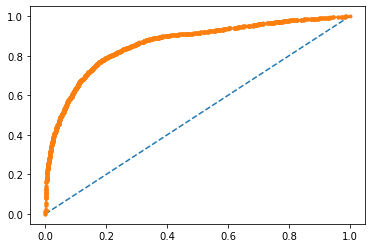

In [394]:
#For train set
print('The accuracy of the model is ', model_LDA.score(x_train1, train_labels1))
print('\n')
print( confusion_matrix(train_labels1, y_train_predict1))
print('\n')
print('Classification Report')
print(classification_report(train_labels1, y_train_predict1))
auc=roc_auc_score(train_labels1,y_train_predict_proba1[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(train_labels1, y_train_predict_proba1[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

The accuracy of the model is  0.8836589698046181


[[2735   86]
 [ 307  250]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2821
           1       0.74      0.45      0.56       557

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378

Area under the curve is 0.8624862136184311


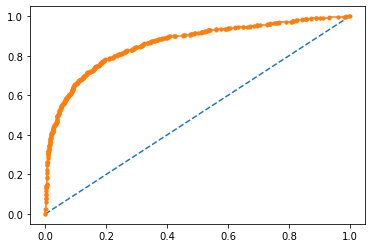

In [395]:
#For test set 
print('The accuracy of the model is ', model_LDA.score(x_test1,test_labels1))
print('\n')
print( confusion_matrix(test_labels1, y_test_predict1))
print('\n')
print('Classification Report')
print( classification_report(test_labels1, y_test_predict1))
auc=roc_auc_score(test_labels1,y_test_predict_proba1[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(test_labels1,y_test_predict_proba1[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

### Model Tuning : LDA

In [403]:
#Model Tuning 

#Using Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver' : ['svd', 'lsqr', 'eigen'],
}

model_LDA= LinearDiscriminantAnalysis()
grid_search= GridSearchCV(estimator = model_LDA, param_grid=param_grid, cv=3)

In [404]:
grid_search.fit(x_train1,train_labels1)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [405]:
grid_search.best_params_  #It is already the best one. 

{'solver': 'svd'}

In [408]:
model_LDA_tuned = LinearDiscriminantAnalysis(solver= 'svd')
model_LDA_tuned.fit(x_train1,train_labels1)

LinearDiscriminantAnalysis()

In [409]:
model_LDA_tuned.score(x_train1, train_labels1)

0.8747779751332149

In [410]:
model_LDA_tuned.score(x_test1, test_labels1)

0.8836589698046181

In [412]:
# Predicting 
y_train_predict_tuned = model_LDA_tuned.predict(x_train1)
y_test_predict_tuned = model_LDA_tuned.predict(x_test1)
y_train_predict_proba_tuned = model_LDA_tuned.predict_proba(x_train1)
y_test_predict_proba_tuned = model_LDA_tuned.predict_proba(x_test1)

The accuracy of the model is  0.8747779751332149


[[6352  191]
 [ 796  543]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6543
           1       0.74      0.41      0.52      1339

    accuracy                           0.87      7882
   macro avg       0.81      0.69      0.73      7882
weighted avg       0.86      0.87      0.86      7882

Area under the curve is 0.8619400331717209


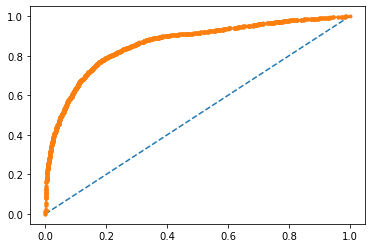

In [413]:
#For train set
print('The accuracy of the model is ', model_LDA_tuned.score(x_train1, train_labels1))
print('\n')
print( confusion_matrix(train_labels1, y_train_predict_tuned))
print('\n')
print('Classification Report')
print(classification_report(train_labels1, y_train_predict_tuned))
auc=roc_auc_score(train_labels1,y_train_predict_proba_tuned[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(train_labels1, y_train_predict_proba_tuned[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

The accuracy of the model is  0.8836589698046181


[[2735   86]
 [ 307  250]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2821
           1       0.74      0.45      0.56       557

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378

Area under the curve is 0.8624862136184311


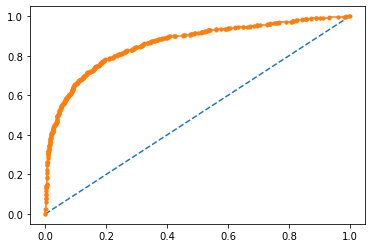

In [414]:
#For test set 
print('The accuracy of the model is ', model_LDA_tuned.score(x_test1,test_labels1))
print('\n')
print( confusion_matrix(test_labels1, y_test_predict_tuned))
print('\n')
print('Classification Report')
print( classification_report(test_labels1, y_test_predict_tuned))
auc=roc_auc_score(test_labels1,y_test_predict_proba_tuned[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(test_labels1,y_test_predict_proba_tuned[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

## Model 3 : Naive Bayes

In [415]:
from sklearn.naive_bayes import GaussianNB

In [418]:
#splitting the data
X = cust_df_customer.drop(['Churn'], axis=1)
Y = cust_df_customer.pop('Churn')

In [427]:
#train-test_split
x_train2,x_test2,train_labels2, test_labels2 =train_test_split(X,Y,test_size=.30, random_state=7)

In [428]:
#Lets train the model 
model_GNB= GaussianNB()
model_GNB.fit(x_train2,train_labels2)

GaussianNB()

In [429]:
model_GNB.get_params
#Variance explained by each variable in each class

<bound method BaseEstimator.get_params of GaussianNB()>

In [431]:
#Accuracy score for train
model_GNB.score(x_train2,train_labels2)

0.8645013955848769

In [432]:
#Accuracy score for test
model_GNB.score(x_test2,test_labels2)

0.8599763173475429

In [433]:
#predicting through model

y_train_predict2= model_GNB.predict(x_train2)
y_test_predict2=model_GNB.predict(x_test2)
y_train_predict_proba2= model_GNB.predict_proba(x_train2)
y_test_predict_proba2=model_GNB.predict_proba(x_test2)

The accuracy of the model is  0.8645013955848769


[[5993  550]
 [ 518  821]]


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6543
           1       0.60      0.61      0.61      1339

    accuracy                           0.86      7882
   macro avg       0.76      0.76      0.76      7882
weighted avg       0.87      0.86      0.87      7882

Area under the curve is 0.8240760810571578


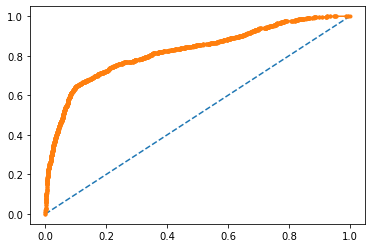

In [434]:
#For train set
print('The accuracy of the model is ', model_GNB.score(x_train2, train_labels2))
print('\n')
print( confusion_matrix(train_labels2, y_train_predict2))
print('\n')
print('Classification Report')
print(classification_report(train_labels2, y_train_predict2))
auc=roc_auc_score(train_labels2,y_train_predict_proba2[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(train_labels2, y_train_predict_proba2[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

The accuracy of the model is  0.8599763173475429


[[2565  256]
 [ 217  340]]


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2821
           1       0.57      0.61      0.59       557

    accuracy                           0.86      3378
   macro avg       0.75      0.76      0.75      3378
weighted avg       0.86      0.86      0.86      3378

Area under the curve is 0.8192136814364185


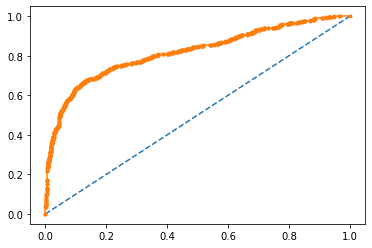

In [435]:
#For test set 
print('The accuracy of the model is ', model_GNB.score(x_test2,test_labels2))
print('\n')
print( confusion_matrix(test_labels2, y_test_predict2))
print('\n')
print('Classification Report')
print( classification_report(test_labels2, y_test_predict2))
auc=roc_auc_score(test_labels2,y_test_predict_proba2[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(test_labels2,y_test_predict_proba2[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

### Model 4 : Random Forest

In [445]:
#It's a supervised technique
from sklearn.ensemble import RandomForestClassifier 

In [446]:
model_rfcl = RandomForestClassifier(random_state=7)
model_rfcl.fit(x_train,train_labels)

RandomForestClassifier(random_state=7)

In [448]:
#accuracy of train
model_rfcl.score(x_train, train_labels) 

1.0

In [449]:
#accuracy of test
model_rfcl.score(x_test, test_labels)

0.9641799881586738

In [475]:
y_predict_rfcl= model_rfcl.predict(x_test)
ytrain_predict_rfcl = model_rfcl.predict(x_train)
y_predict_proba_rfcl = model_rfcl.predict_proba(x_test)
ytrain_predict_proba_rfcl = model_rfcl.predict_proba(x_train)


In [477]:
print (classification_report(train_labels,ytrain_predict_rfcl))
print (classification_report(test_labels,y_predict_rfcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6543
           1       1.00      1.00      1.00      1339

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2821
           1       0.94      0.83      0.88       557

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [479]:
auc=roc_auc_score(test_labels,y_predict_proba_rfcl[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.9923489957659182


In [480]:
auc=roc_auc_score(train_labels,ytrain_predict_proba_rfcl[:,1])
print('Area under the curve is', auc)

Area under the curve is 1.0


In [451]:
from sklearn.ensemble import BaggingClassifier 
bc= BaggingClassifier(base_estimator = model_rfcl, n_estimators = 50,random_state= 1)
#bc= BaggingClassifier( n_estimators = 50,random_state= 1)
bc.fit(x_train,train_labels)


#By default even if we donot give it base_estimator command, it will take the complex data
#The data that is there and has not been pruned.

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=7),
                  n_estimators=50, random_state=1)

In [481]:
#For bagging 
#predicting for bagging method
y_predict= bc.predict(x_test)
ytrain_predict = bc.predict(x_train)
y_predict_proba = bc.predict_proba(x_test)
ytrain_predict_proba = bc.predict_proba(x_train)

# print(confusion_matrix(test_labels,y_predict, labels=[0,1] ))
print (classification_report(test_labels,y_predict))
print (classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2821
           1       0.93      0.79      0.85       557

    accuracy                           0.96      3378
   macro avg       0.94      0.89      0.91      3378
weighted avg       0.95      0.96      0.95      3378

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6543
           1       1.00      0.98      0.99      1339

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [484]:
auc=roc_auc_score(test_labels,y_predict_proba[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.9876643308044246


In [453]:
#for accuracy score through ensemble method bagging
bc.score(x_test,test_labels)

0.9550029603315572

In [454]:
bc.score(x_train,train_labels)

0.9961938594265415

Adaboosting

In this technique each next model improves on the previous model. Hence gives out the best prediction. 
Unlike Bagging, Adaptive Boosting takes into account regularized or pruned dataset. As more the complex model is, the worst the result it gives out. 

When we donot put any base_estimator=decision_treeR (regularized model), it by default makes a model with a depth of one or two. 

In [455]:
from sklearn.ensemble import AdaBoostClassifier
# base_estimator=decision_tree
adbc =  AdaBoostClassifier( n_estimators= 10, random_state=1)
# adbc =  AdaBoostClassifier(base_estimator=decision_treeR, n_estimators= 10, random_state=1)
adbc.fit(x_train,train_labels)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [456]:
adbc.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [457]:
#predicting for adaboosting method
y_predict= adbc.predict(x_test)
confusion_matrix(test_labels,y_predict, labels=[0,1] )
#model has actually improved on predicting true negatives but could not predict true positives
#this model performs worse than bagging

array([[2654,  167],
       [ 241,  316]], dtype=int64)

In [458]:
adbc.score(x_train,train_labels)

0.8870844963207308

In [459]:
#for accuracy score through ensemble method adaboosting method
adbc.score(x_test,test_labels)

0.8792184724689165

In [485]:
#predicting for bagging method - train
y_predict= adbc.predict(x_train)
y_predict_proba = adbc.predict_proba(x_train)
print(confusion_matrix(train_labels,y_predict, labels=[0,1] ))
print (classification_report(train_labels,y_predict))

[[6213  330]
 [ 560  779]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6543
           1       0.70      0.58      0.64      1339

    accuracy                           0.89      7882
   macro avg       0.81      0.77      0.78      7882
weighted avg       0.88      0.89      0.88      7882



In [486]:
auc=roc_auc_score(train_labels,y_predict_proba[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.8881553032806355


In [487]:
#predicting for bagging method - test
y_predict= adbc.predict(x_test)
y_predict_proba = adbc.predict_proba(x_test)
print(confusion_matrix(test_labels,y_predict, labels=[0,1] ))
print (classification_report(test_labels,y_predict))

[[2654  167]
 [ 241  316]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2821
           1       0.65      0.57      0.61       557

    accuracy                           0.88      3378
   macro avg       0.79      0.75      0.77      3378
weighted avg       0.87      0.88      0.88      3378



In [488]:
auc=roc_auc_score(test_labels,y_predict_proba[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.8850373290345491


In [462]:
#for accuracy score through ensemble method bagging
bc.score(x_test,test_labels)

0.9550029603315572

In [464]:
#accuracy of test
model_rfcl.score(x_test, test_labels)

0.9641799881586738

Gradient Boosting

Gradient Boosting is inherently a regression algorithm - used for predicting. 

This basically uses the loss function and measures the residual difference between predicted y and actual y (which actually shows the residuals). 

From one step  to the other it measures it, 
difference between y observed and y - l1
then it reduces the loss fuction in second step by predicting y2 - l2
then it try reduces the loss fuction in third step by predicting y3 - l3 


Because it measures the loss that is why it is more adapted to calculate target variable

In [465]:
from sklearn.ensemble import GradientBoostingClassifier
# gcbl =  GradientBoostingClassifier(n_estimators= 50, random_state=1)
gcbl =  GradientBoostingClassifier(n_estimators= 50, random_state=1, verbose=True)
gcbl.fit(x_train,train_labels)

      Iter       Train Loss   Remaining Time 
         1           0.8461            3.97s
         2           0.8005            6.87s
         3           0.7660            4.86s
         4           0.7386            4.38s
         5           0.7165            3.76s
         6           0.6978            3.10s
         7           0.6813            2.79s
         8           0.6668            2.47s
         9           0.6547            2.47s
        10           0.6440            2.26s
        20           0.5813            1.29s
        30           0.5426            0.86s
        40           0.5182            0.42s
        50           0.4991            0.00s


GradientBoostingClassifier(n_estimators=50, random_state=1, verbose=True)

In [466]:
gcbl.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(n_estimators=50, random_state=1, verbose=True)>

In [490]:
y_predict= gcbl.predict(x_train)
confusion_matrix(train_labels,y_predict, labels=[0,1] )
# predicting for bagging method
# y_predict= .predict(x_train)
y_predict_proba = gcbl.predict_proba(x_train)
print(confusion_matrix(train_labels,y_predict, labels=[0,1] ))
print (classification_report(train_labels,y_predict))

[[6347  196]
 [ 569  770]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6543
           1       0.80      0.58      0.67      1339

    accuracy                           0.90      7882
   macro avg       0.86      0.77      0.81      7882
weighted avg       0.90      0.90      0.90      7882



In [491]:
auc=roc_auc_score(train_labels,y_predict_proba[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.924658806217546


In [492]:
y_predict= gcbl.predict(x_test)
confusion_matrix(test_labels,y_predict, labels=[0,1] )
# predicting for bagging method
# y_predict= adbc.predict(x_test)
y_predict_proba = gcbl.predict_proba(x_test)
print(confusion_matrix(test_labels,y_predict, labels=[0,1] ))
print (classification_report(test_labels,y_predict))

[[2719  102]
 [ 243  314]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2821
           1       0.75      0.56      0.65       557

    accuracy                           0.90      3378
   macro avg       0.84      0.76      0.79      3378
weighted avg       0.89      0.90      0.89      3378



In [493]:
auc=roc_auc_score(test_labels,y_predict_proba[:,1])
print('Area under the curve is', auc)

Area under the curve is 0.9203641959476789


In [469]:
#for accuracy score through ensemble method gradientboosting method
gcbl.score(x_test,test_labels)

0.8978685612788633

In [470]:
#for accuracy score through ensemble method adaboosting method
adbc.score(x_test,test_labels)

0.8792184724689165

In [471]:
#for accuracy score through ensemble method bagging
bc.score(x_test,test_labels)

0.9550029603315572

In [474]:
#accuracy of test
model_rfcl.score(x_test, test_labels)

0.9641799881586738

In [497]:
index=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
data1 = pd.DataFrame ( { 'LogisticR_train' : [0.88, 0.87, 0.44, 0.73, 0.55], 
        'LogisticR_test' : [0.89,0.87, 0.48, 0.75, 0.59],
                       
        'LDA_train' : [0.874, 0.861, 0.41, 0.74, 0.52],
        'LDA_test' : [0.88, 0.862, 0.45,0.74, 0.56],
                       
        'NaiveBayes_train': [0.86, 0.824,0.61, 0.60, 0.61],
        'NaiveBayes_test': [0.86, 0.82, 0.61, 0.57, 0.59], 
                     
                     
        'RandomForest_train': [1.0,1.0,1.0, 1.0, 1.0],
        'RandomForest_test': [0.96, 0.992, 0.83, 0.94, 0.88], 
        
        'Bagging_train': [1.0,0.99,0.98,1.0, 0.99],
        'Bagging_test': [0.96,0.98, 0.79, 0.93, 0.85],
         
        'Adaboosting_train': [0.89,0.89,0.58, 0.70, 0.64],
        'Adaboosting_test': [0.88,0.89, 0.57, 0.65, 0.61],
                                     
        'GBoosting_train': [0.90,0.92,0.58, 0.80, 0.67],
        'GBoosting_test': [0.90,0.92, 0.56, 0.75, 0.65] }, index=index).T
# round(data,2)

In [498]:
data1

,Accuracy,AUC,Recall,Precision,F1 Score
LogisticR_train,0.880,0.870,0.44,0.73,0.55
LogisticR_test,0.890,0.870,0.48,0.75,0.59
LDA_train,0.874,0.861,0.41,0.74,0.52
LDA_test,0.880,0.862,0.45,0.74,0.56
NaiveBayes_train,0.860,0.824,0.61,0.60,0.61
NaiveBayes_test,0.860,0.820,0.61,0.57,0.59
RandomForest_train,1.000,1.000,1.00,1.00,1.00
RandomForest_test,0.960,0.992,0.83,0.94,0.88
Bagging_train,1.000,0.990,0.98,1.00,0.99
Bagging_test,0.960,0.980,0.79,0.93,0.85


In [ ]:
Adaboosting and GBoosting gives consistent result in accordance to test and train
Naive Bayes is also performing better

In [ ]:
#if time left do SMOTE